<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


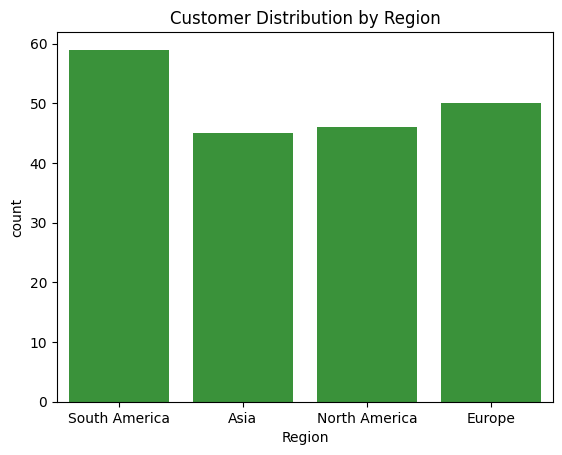

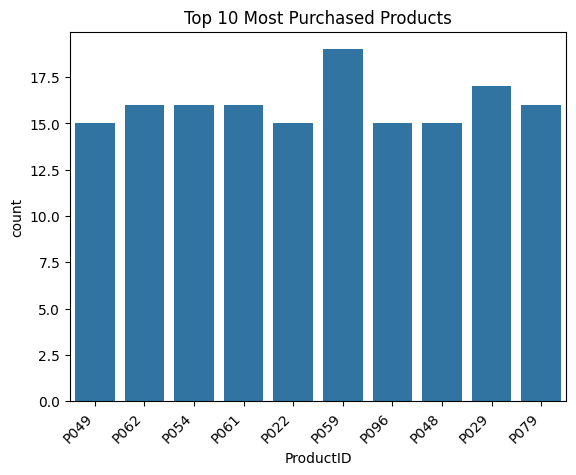

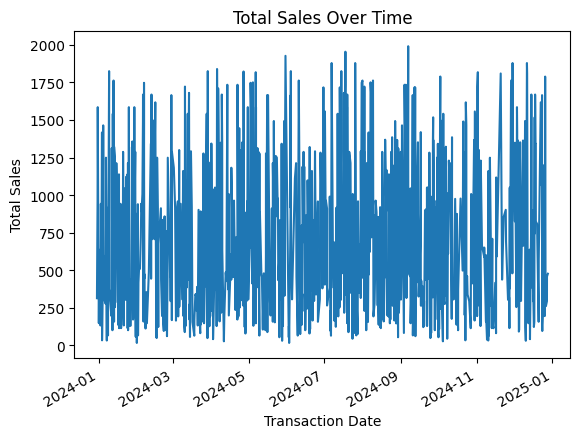

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

customers.head()
customers.info()
customers.describe()

products.head()
products.info()
products.describe()

transactions.head()
transactions.info()
transactions.describe()


if 'Age' in customers.columns:
    sns.histplot(customers['Age'])
else:
    print("Warning: 'Age' column not found in customers DataFrame. Skipping histogram.")

sns.countplot(x='Region', data=customers)
sns.scatterplot(x='Price', y='Quantity', data=transactions)


sns.countplot(x='Region', data=customers)
plt.title('Customer Distribution by Region')
plt.show()


top_products = transactions['ProductID'].value_counts().nlargest(10).index
sns.countplot(x='ProductID', data=transactions[transactions['ProductID'].isin(top_products)])
plt.title('Top 10 Most Purchased Products')
plt.xticks(rotation=45, ha='right')
plt.show()


transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['TotalValue'] = pd.to_numeric(transactions['TotalValue'])
transactions.groupby('TransactionDate')['TotalValue'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Total Sales')
plt.show()